In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [43]:
df_tri=pd.read_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\trigrammask.csv')
#np.random.seed(0))
df_tri.head()

,trigram,repetation
0,new covid cases,47
1,f f f,38
2,n n n,25
3,covid cases recoveries,24
4,reports new covid,23


In [41]:
df_bi=pd.read_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\bigrammask.csv')
#np.random.seed(0))
df_bi.head()

,bigram,repetation
0,n n,132
1,f f,93
2,covid cases,60
3,new covid,50
4,last hours,40


In [71]:
df_uni=pd.read_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\unigrammask.csv')
#np.random.seed(0))
df_uni.head()

,unigram,repetation
0,n,464
1,covid,348
2,f,224
3,india,135
4,cases,118


In [72]:
df_tri.columns
tweet3=df_tri.copy()
df_bi.columns
tweet2=df_bi.copy()
df_uni.columns
tweet1=df_uni.copy()

In [73]:
tweet3.head()

,trigram,repetation
0,new covid cases,47
1,f f f,38
2,n n n,25
3,covid cases recoveries,24
4,reports new covid,23


In [74]:
tweet2.shape
tweet3.shape

(11571, 2)

In [75]:
tweet3.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        trigram  repetation
0        False       False
1        False       False
2        False       False
3        False       False
4        False       False
...        ...         ...
11566    False       False
11567    False       False
11568    False       False
11569    False       False
11570    False       False

[11571 rows x 2 columns]>

In [76]:
tweet3['sentiment'] = ' '
tweet3['polarity'] = None
for i,tweets in enumerate(tweet3.trigram) :
    blob = TextBlob(tweets)
    tweet3['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet3['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet3['sentiment'][i] = 'negative'
    else :
        tweet3['sentiment'][i] = 'neutral'
tweet3.head(30)

,trigram,repetation,sentiment,polarity
0,new covid cases,47,positive,0.136364
1,f f f,38,neutral,0.0
2,n n n,25,neutral,0.0
3,covid cases recoveries,24,neutral,0.0
4,reports new covid,23,positive,0.136364
5,india reports new,21,positive,0.136364
6,f e f,20,neutral,0.0
7,deaths last hours,19,neutral,0.0
8,last hours per,15,neutral,0.0
9,n n covid,14,neutral,0.0


In [79]:
tweet1['sentiment'] = ' '
tweet1['polarity'] = None
for i,tweets in enumerate(tweet1.unigram) :
    blob = TextBlob(str(tweets))
    tweet1['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet1['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet1['sentiment'][i] = 'negative'
    else :
        tweet1['sentiment'][i] = 'neutral'
tweet1.head()

,unigram,repetation,sentiment,polarity
0,n,464,neutral,0.0
1,covid,348,neutral,0.0
2,f,224,neutral,0.0
3,india,135,neutral,0.0
4,cases,118,neutral,0.0


In [80]:
tweet1.head(30)

,unigram,repetation,sentiment,polarity
0,n,464,neutral,0.0
1,covid,348,neutral,0.0
2,f,224,neutral,0.0
3,india,135,neutral,0.0
4,cases,118,neutral,0.0
5,new,116,positive,0.136364
6,e,60,neutral,0.0
7,vaccination,50,neutral,0.0
8,last,49,neutral,0.0
9,today,45,neutral,0.0


In [81]:
tweet2['sentiment'] = ' '
tweet2['polarity'] = None
for i,tweets in enumerate(tweet2.bigram) :
    blob = TextBlob(tweets)
    tweet2['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet2['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet2['sentiment'][i] = 'negative'
    else :
        tweet2['sentiment'][i] = 'neutral'
tweet2.head(30)

,bigram,repetation,sentiment,polarity
0,n n,132,neutral,0.0
1,f f,93,neutral,0.0
2,covid cases,60,neutral,0.0
3,new covid,50,positive,0.136364
4,last hours,40,neutral,0.0
5,e f,29,neutral,0.0
6,reports new,27,positive,0.136364
7,f n,26,neutral,0.0
8,cases recoveries,26,neutral,0.0
9,n covid,25,neutral,0.0


In [82]:
tweet3.describe()

,repetation
count,11571.000000
mean,1.875897
std,17.375361
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,728.000000


In [83]:
tweet1.describe()

,repetation
count,6147.000000
mean,4.246299
std,37.111092
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1742.000000


In [84]:
tweet2.describe()

,repetation
count,11098.000000
mean,2.153811
std,19.537235
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,728.000000


In [85]:
tweet3.groupby('sentiment').size()

sentiment
negative     534
neutral     9623
positive    1414
dtype: int64

In [86]:
tweet1.groupby('sentiment').size()

sentiment
negative     117
neutral     5841
positive     189
dtype: int64

In [87]:
tweet2.groupby('sentiment').size()

sentiment
negative     354
neutral     9789
positive     955
dtype: int64

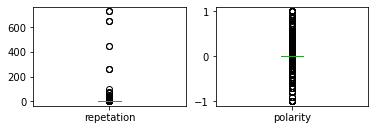

In [88]:
import matplotlib.pyplot as plt
tweet3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

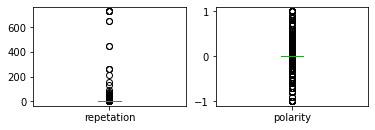

In [89]:
import matplotlib.pyplot as plt
tweet2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

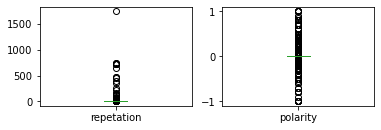

In [90]:
import matplotlib.pyplot as plt
tweet1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [92]:
tweet3.groupby('polarity').size()

polarity
-1.00    17
-0.90     3
-0.80     6
-0.80     2
-0.70     3
         ..
 0.75     1
 0.80    72
 0.85     4
 0.90     5
 1.00    32
Length: 141, dtype: int64

In [93]:
clo=['trigram','repetation','polarity','sentiment']
dataset3=tweet3.reindex(columns=clo)
#dataset2.head()
dataset3[:10]

,trigram,repetation,polarity,sentiment
0,new covid cases,47,0.136364,positive
1,f f f,38,0.0,neutral
2,n n n,25,0.0,neutral
3,covid cases recoveries,24,0.0,neutral
4,reports new covid,23,0.136364,positive
5,india reports new,21,0.136364,positive
6,f e f,20,0.0,neutral
7,deaths last hours,19,0.0,neutral
8,last hours per,15,0.0,neutral
9,n n covid,14,0.0,neutral


In [95]:
clo=['bigram','repetation','polarity','sentiment']
dataset2=tweet2.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,bigram,repetation,polarity,sentiment
0,n n,132,0.0,neutral
1,f f,93,0.0,neutral
2,covid cases,60,0.0,neutral
3,new covid,50,0.136364,positive
4,last hours,40,0.0,neutral
5,e f,29,0.0,neutral
6,reports new,27,0.136364,positive
7,f n,26,0.0,neutral
8,cases recoveries,26,0.0,neutral
9,n covid,25,0.0,neutral


In [96]:
clo=['unigram','repetation','polarity','sentiment']
dataset1=tweet1.reindex(columns=clo)
#dataset2.head()
dataset1[:10]

,unigram,repetation,polarity,sentiment
0,n,464,0.0,neutral
1,covid,348,0.0,neutral
2,f,224,0.0,neutral
3,india,135,0.0,neutral
4,cases,118,0.0,neutral
5,new,116,0.136364,positive
6,e,60,0.0,neutral
7,vaccination,50,0.0,neutral
8,last,49,0.0,neutral
9,today,45,0.0,neutral


In [94]:
dataset3.to_csv(r"C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\trigrammask_pol_sent.csv",index=False)

In [97]:
dataset2.to_csv(r"C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\bigrammask_pol_sent.csv",index=False)
dataset1.to_csv(r"C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\unigrammask_pol_sent.csv",index=False)